# ----------Heart Disease Diagnostic Analysis---------
# Problem Statement
## Health is real wealth in the pandemic time we all realized the brute effects of covid 19 on all irrespective of any status. You are required to analyse this health and medical data for better future preparation.

# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import re
sns.set(style="ticks")

# ETL - Extract , Transform , Load 

In [2]:
#Extract the Dataset 
df=pd.read_csv("heart_disease_dataset.csv")


In [3]:
#Show first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
#Show last 5 Rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


In [5]:
#find how many rows and columns in daatset
df.shape
print("no of rows:",df.shape[0])
print("no of column",df.shape[1])

no of rows: 303
no of column 14


In [6]:
#find more information about dat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#statistical information about data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [8]:
#how many unique values having data
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           2
dtype: int64

In [9]:
#number of duplicated values
df.duplicated().sum()

0

information about dataset

1) age: The person's age in years

2) sex: The person's sex (1 = male, 0 = female)

3) cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4) trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5) chol: The person's cholesterol measurement in mg/dl

6) fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7) restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8) thalach: The person's maximum heart rate achieved

9) exang: Exercise induced angina (1 = yes; 0 = no)

10) oldpeak: ST depression induced by exercise relative to rest

11) slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12) ca: The number of major vessels (0-3)

13) thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14) num: Heart disease (0 = no, 1 = yes)



In [10]:
#list out all column name
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [11]:
# Null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
#rename the values in column sex


In [14]:
df['gender']=df['sex']
df.loc[df.gender==1,'gender']="Male"
df.loc[df.gender==0,'gender']="Female"

In [15]:
#create a new column and name as age range
df['age range']=df['age']
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Male,63
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Male,67


In [16]:
def age_range(i):
        if i>14 and i<40:
            return 'young'
        elif i<41 and i<50:
            return "middle"
        else:
            return "old"
    

In [17]:
df['age range']=df['age range'].apply(age_range)

In [18]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Male,old
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Male,old


In [19]:
df.ca.value_counts()

 0         176
 1          65
 2          38
 3          20
-100000      4
Name: ca, dtype: int64

In [20]:
df[df.ca==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range
166,52,1,3,138,223,0,0,169,0,0.0,1,-100000,3,0,Male,old
192,43,1,4,132,247,1,2,143,1,0.1,2,-100000,7,1,Male,old
287,58,1,2,125,220,0,0,144,0,0.4,2,-100000,7,0,Male,old
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0,Male,young


In [21]:
df.loc[df.ca==-100000,'ca']=np.nan

In [22]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [24]:
df.thal.value_counts()

 3         166
 7         117
 6          18
-100000      2
Name: thal, dtype: int64

In [25]:
df[df.thal==-100000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,-100000,0,Female,old
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,-100000,1,Male,old


In [26]:
df.loc[df.thal==-100000,'thal']=np.nan

In [27]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [28]:
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
num            2
gender         2
age range      3
dtype: int64

In [29]:
df["Fast_Bloodsugar"]=df["fbs"]

In [30]:
df.loc[df.Fast_Bloodsugar==1,"Fast_Bloodsugar"]="Yes"
df.loc[df.Fast_Bloodsugar==0,"Fast_Bloodsugar"]="No"
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range,Fast_Bloodsugar
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Male,old,Yes
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,Male,old,No
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Male,old,No
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Male,young,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Female,old,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Male,old,No
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,Male,old,Yes
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,Male,old,No
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Female,old,No


In [31]:
df=df.astype({"sex":"category","cp":"category","fbs":'category',"restecg":"category",
             "exang":"category","ca":"category","thal":"category"})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              303 non-null    int64   
 1   sex              303 non-null    category
 2   cp               303 non-null    category
 3   trestbps         303 non-null    int64   
 4   chol             303 non-null    int64   
 5   fbs              303 non-null    category
 6   restecg          303 non-null    category
 7   thalach          303 non-null    int64   
 8   exang            303 non-null    category
 9   oldpeak          303 non-null    float64 
 10  slope            303 non-null    int64   
 11  ca               299 non-null    category
 12  thal             301 non-null    category
 13  num              303 non-null    int64   
 14  gender           303 non-null    object  
 15  age range        303 non-null    object  
 16  Fast_Bloodsugar  303 non-null    object  
dt

# EDA WITH PANDAS-PROFILING

In [33]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport


In [34]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import re
sns.set(style="ticks")

# Pairplot

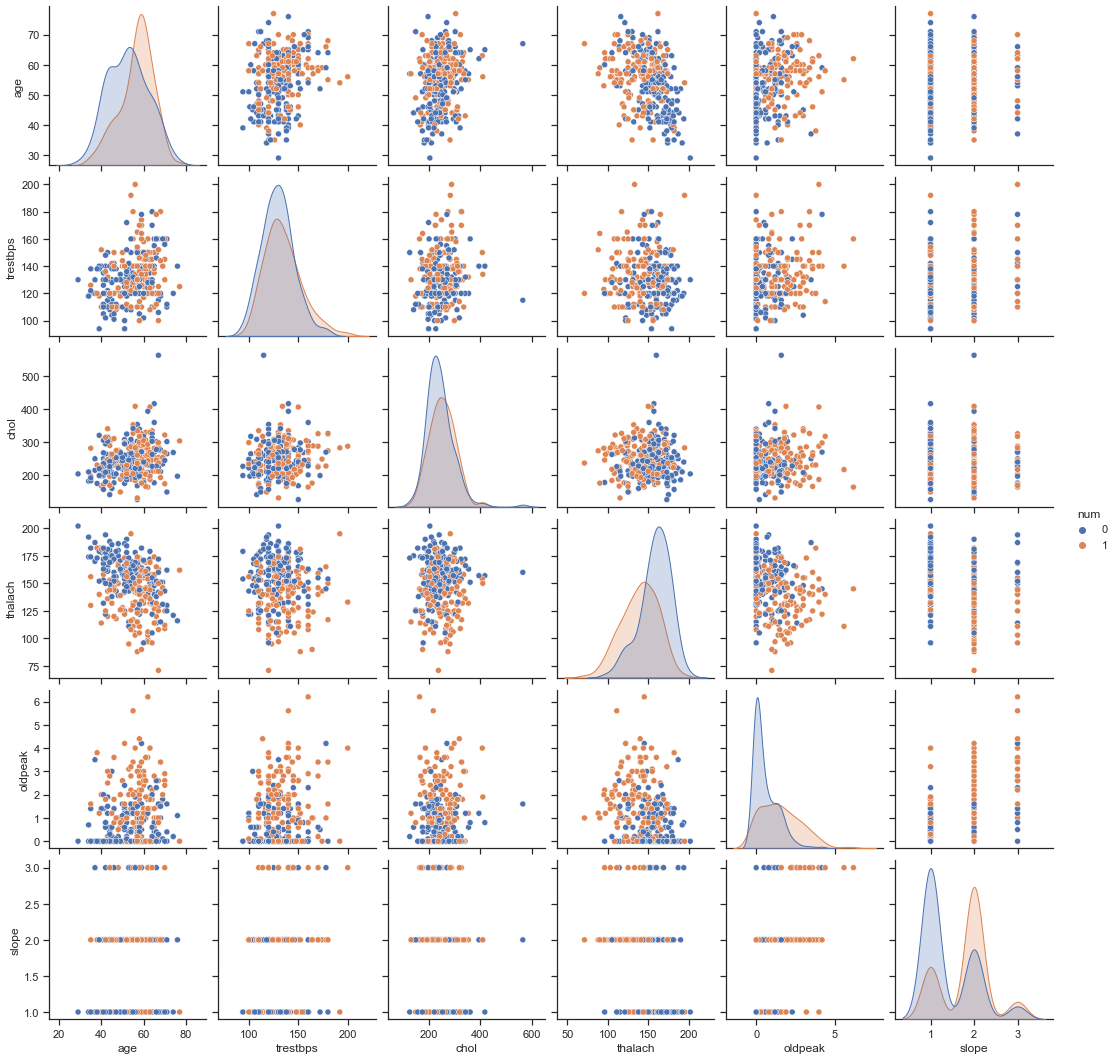

In [36]:
sns.pairplot(data=df,hue='num');

# EDA 

In [37]:
df['target']=df['num']
df.loc[df['target']==0,'target']="No disease"
df.loc[df['target']==1,'target']='Disease'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range,Fast_Bloodsugar,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Male,old,Yes,No disease
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,Male,old,No,Disease
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Male,old,No,Disease
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Male,young,No,No disease
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Female,old,No,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Male,old,No,Disease
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,Male,old,Yes,Disease
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,Male,old,No,Disease
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Female,old,No,Disease


In [38]:
df.target.value_counts()

No disease    164
Disease       139
Name: target, dtype: int64

# Heart disease rates

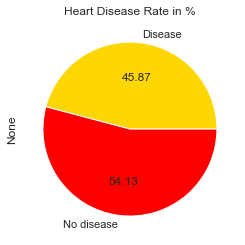

In [39]:
df.groupby('target').size().plot(kind='pie', autopct='%.2f',colors=['gold', 'red'])
plt.title("Heart Disease Rate in %")
plt.show()

# Heart disease by gender

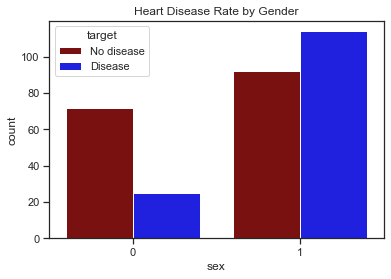

In [40]:
sns.countplot(data=df,x='sex',hue='target',palette=("darkred","blue"))
plt.title("Heart Disease Rate by Gender")
plt.show()

# Heart disease by Age

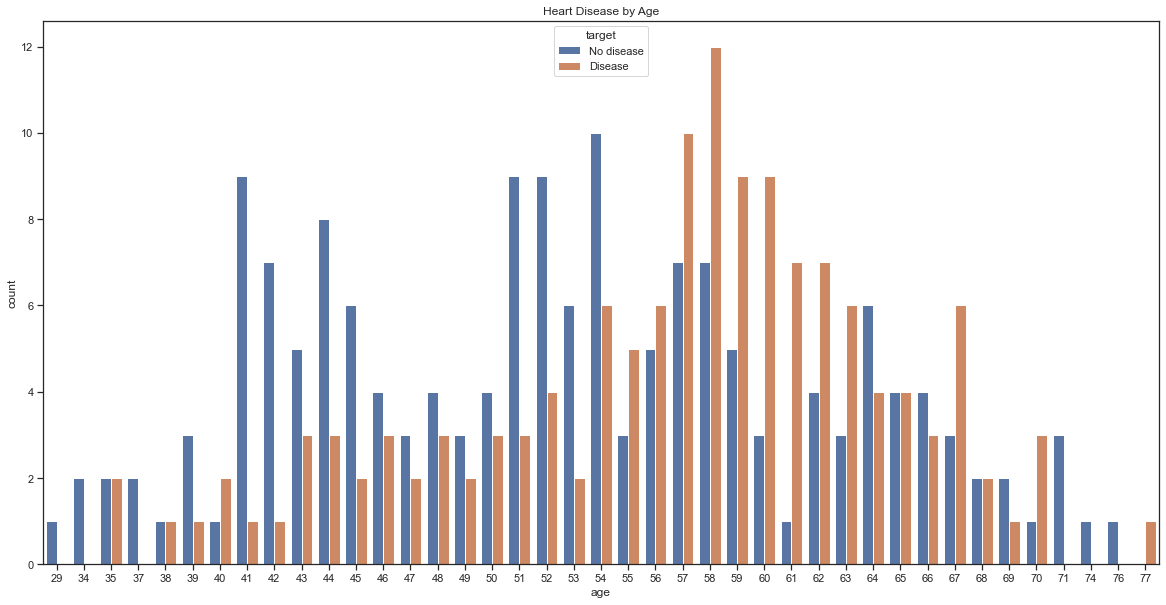

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='age',hue="target")
plt.title('Heart Disease by Age');

# count of people by gender

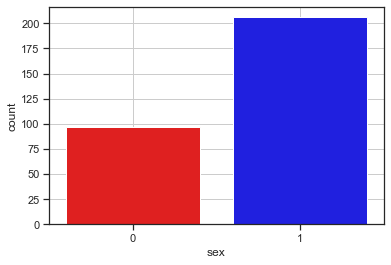

In [42]:
sns.countplot(data=df,x="sex",palette=("red","blue"))
plt.grid(True)
plt.show()

# Count of Eacg type chest pain

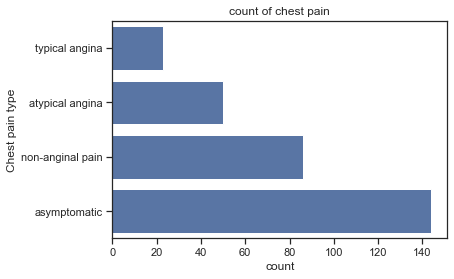

In [43]:
sns.countplot(data=df,y="cp",color="b")
plt.title("count of chest pain")
plt.ylabel("Chest pain type")
plt.yticks([0,1,2,3],("typical angina","atypical angina","non-anginal pain","asymptomatic"));

# Count of Fast Blood Sugar

In [44]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

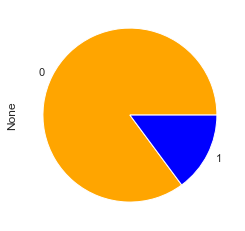

In [45]:
df.groupby('fbs').size().plot(kind="pie",colors=["orange","blue"]);

# Fbs wrt Gender

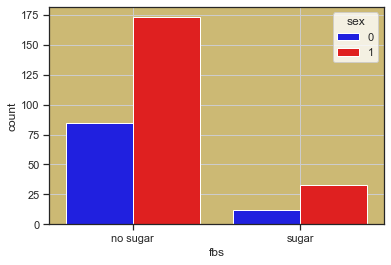

In [46]:
sns.countplot(data=df,x="fbs",hue="sex",palette=('blue','red'))
plt.xticks([0,1],["no sugar","sugar"])
plt.grid(True)
plt.gca().set_facecolor("y")

# Load cleaned data

In [47]:
df.to_csv('C:/Users/virak/OneDrive/Desktop/ineuron/cleaned_data.csv',index=False)

In [48]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,gender,age range,Fast_Bloodsugar,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Male,old,Yes,No disease
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,Male,old,No,Disease
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Male,old,No,Disease
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Male,young,No,No disease
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Female,old,No,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Male,old,No,Disease
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,Male,old,Yes,Disease
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,Male,old,No,Disease
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Female,old,No,Disease
